In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
ds=pd.read_csv(r"C:\Users\guna5\Downloads\Crop_recommendation.csv")

In [3]:
df=pd.DataFrame(ds)
print(df.head())

   Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     rainfall label  Unnamed: 8  Unnamed: 9  
0  202.935536  rice         NaN         NaN  
1  226.655537  rice         NaN         NaN  
2  263.964248  rice         NaN         NaN  
3  242.864034  rice         NaN         NaN  
4  262.717340  rice         NaN         NaN  


In [4]:
print(df.shape)

(2200, 10)


In [5]:
columns_to_drop=["Unnamed: 8","Unnamed: 9"]
df=df.drop(columns=columns_to_drop)

In [6]:
print(df.head())

   Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     rainfall label  
0  202.935536  rice  
1  226.655537  rice  
2  263.964248  rice  
3  242.864034  rice  
4  262.717340  rice  


In [10]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print("INDEPENDENT VARIABLES")
print(x.head())
print("DEPENDENT VARIABLE")
print(y.head())

INDEPENDENT VARIABLES
   Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     rainfall  
0  202.935536  
1  226.655537  
2  263.964248  
3  242.864034  
4  262.717340  
DEPENDENT VARIABLE
0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
print(df['label'].unique())

[20 11  3  9 18 13 14  2 10 19  1 12  7 21 15  0 16 17  4  6  8  5]


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1760, 7)
(440, 7)
(1760,)
(440,)


In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
y_pred=rfc.predict(x_test)
print(y_pred)

['watermelon' 'watermelon' 'grapes' 'chickpea' 'blackgram' 'rice'
 'mothbeans' 'kidneybeans' 'muskmelon' 'banana' 'mothbeans' 'coffee'
 'lentil' 'mungbean' 'mango' 'apple' 'coffee' 'lentil' 'coffee' 'mango'
 'coconut' 'blackgram' 'kidneybeans' 'jute' 'cotton' 'coffee' 'lentil'
 'orange' 'mothbeans' 'kidneybeans' 'pomegranate' 'rice' 'maize'
 'muskmelon' 'coconut' 'cotton' 'mango' 'mango' 'watermelon' 'mothbeans'
 'maize' 'blackgram' 'pigeonpeas' 'watermelon' 'pigeonpeas' 'mungbean'
 'kidneybeans' 'kidneybeans' 'cotton' 'mungbean' 'mothbeans' 'blackgram'
 'apple' 'muskmelon' 'pigeonpeas' 'banana' 'papaya' 'mango' 'lentil'
 'cotton' 'orange' 'mungbean' 'watermelon' 'rice' 'muskmelon' 'apple'
 'grapes' 'coffee' 'apple' 'orange' 'coconut' 'pomegranate' 'kidneybeans'
 'maize' 'grapes' 'mothbeans' 'chickpea' 'maize' 'jute' 'mango' 'rice'
 'blackgram' 'watermelon' 'watermelon' 'muskmelon' 'cotton' 'maize'
 'lentil' 'mothbeans' 'papaya' 'blackgram' 'jute' 'mungbean' 'grapes'
 'mungbean' 'maize

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

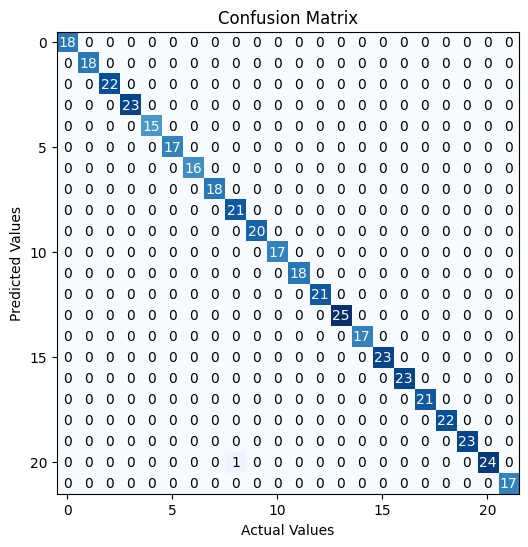

In [22]:
from mlxtend.plotting import plot_confusion_matrix
fig,ax=plot_confusion_matrix(conf_mat=cm,figsize=(6,6),cmap=plt.cm.Blues)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()

In [23]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9977272727272727


In [24]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      1.00      0.98        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [27]:
arr=[[22.4,116.2,69.420,19.23,19.58,19.28,19.57]]
print(rfc.predict(arr))

['chickpea']


C:\Users\guna5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
